# PANDAS VISUALIZATIONS CASE STUDY

## IMPOTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

## IMPORTING DATASETS

In [2]:
sales_data = pd.read_csv('C:/Users/shubh/Desktop/ALABS PYTHON CASE STUDIES/FOUNDATION/6. Pandas Case Study 4 - Python Visualizations Case Study/6. Pandas Case Study 4 - Python Visualizations Case Study/SalesData.csv')

In [3]:
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


### Q1. Compare Sales by region for 2016 with 2015 using bar chart

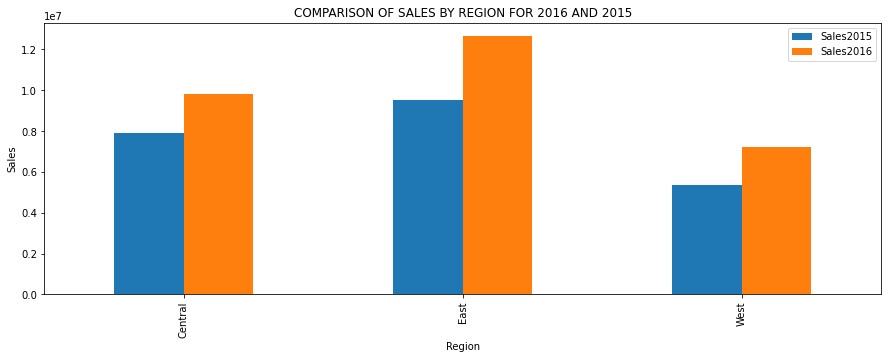

In [105]:
sales_data.groupby('Region').sum()[['Sales2015', 'Sales2016']].plot(kind = 'bar', figsize = (15, 5))
plt.title('COMPARISON OF SALES BY REGION FOR 2016 AND 2015')
plt.ylabel('Sales')
plt.show()

### Q2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

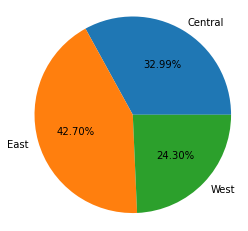

In [5]:
plt.pie(sales_data.groupby('Region').sum()['Sales2016'], autopct='%1.2f%%', labels = ['Central', 'East', 'West'])
plt.autoscale()
plt.show()

### Q3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

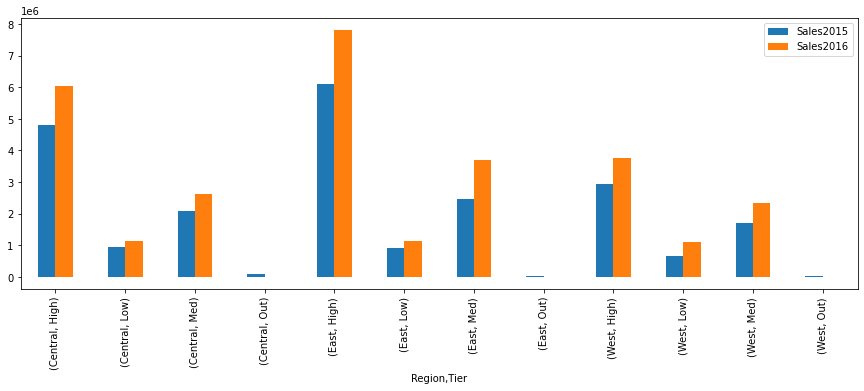

In [101]:
sales_data.groupby(['Region', 'Tier']).sum()[['Sales2015', 'Sales2016']].plot(kind = 'bar', figsize = (15, 5))
plt.show()

### Q4. In East region, which state registered a decline in 2016 as compared to 2015?

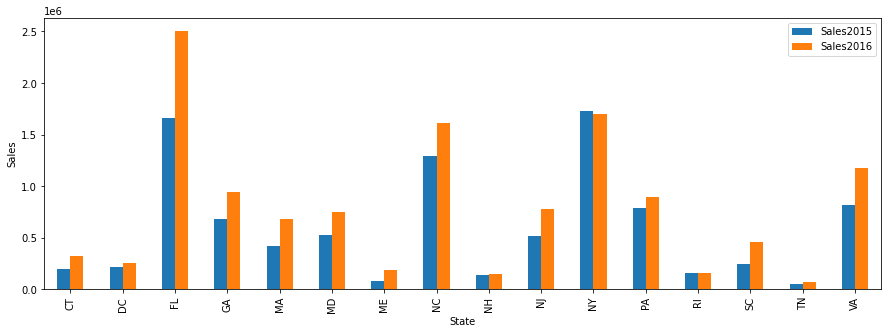

In [102]:
sales_data[sales_data['Region'] == 'East'].groupby('State').sum()[['Sales2015', 'Sales2016']].plot(kind = 'bar', figsize = (15, 5))
plt.ylabel('Sales')
plt.show()
# FROM THE BELOW GRAPH IT IS EVIDENT THAT NONE OF THE STATES DECLINED IN SALES IN 2016 COMPARED TO 2015

### Q5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

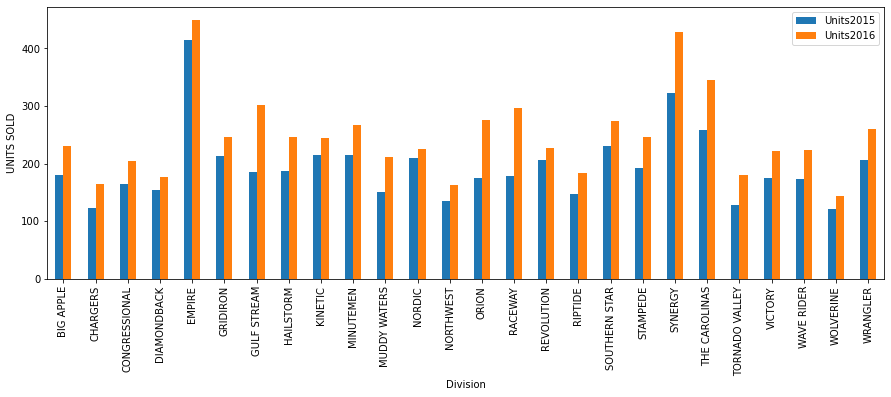

In [106]:
sales_data[sales_data['Tier'] == 'High'].groupby('Division').sum()[['Units2015', 'Units2016']].plot(kind = 'bar', figsize = (15, 5))
plt.ylabel('UNITS SOLD')
plt.show()

### Q6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
• Jan - Mar : Q1
• Apr - Jun : Q2
• Jul - Sep : Q3
• Oct - Dec : Q4

In [42]:
sales_data['Qtr'] = np.where((sales_data['Month'] == 'Jan') | (sales_data['Month'] == 'Feb') | (sales_data['Month'] == 'Mar'), 'Q1', 
                            np.where((sales_data['Month'] == 'Apr') | (sales_data['Month'] == 'May') | (sales_data['Month'] == 'Jun'), 'Q2',
                                    np.where((sales_data['Month'] == 'Jul') | (sales_data['Month'] == 'Aug') | (sales_data['Month'] == 'Sep'), 'Q3', 'Q4')))
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


### Q7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

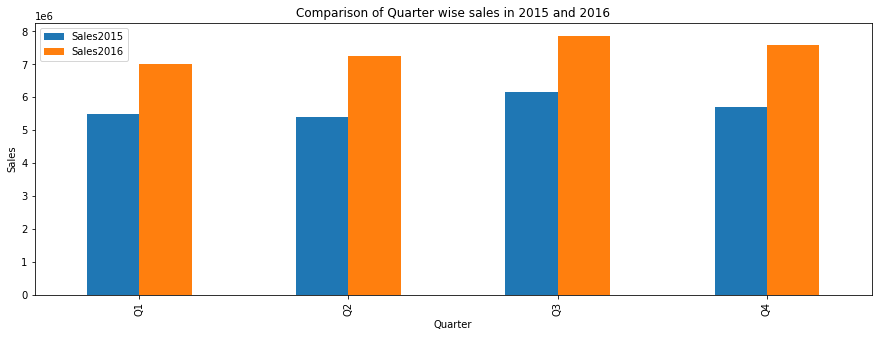

In [104]:
sales_data.groupby('Qtr').sum()[['Sales2015', 'Sales2016']].plot(kind = 'bar', figsize = (15, 5))
plt.title('Comparison of Quarter wise sales in 2015 and 2016')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()

### Q8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [36]:
q8_data = pd.DataFrame(sales_data.groupby(['Qtr', 'Tier']).sum())
q8_data.reset_index(inplace = True)
q8_data.drop(columns = ['AccountId', 'Sales2015', 'Units2015', 'Units2016', 
                        'TargetAchevied2015', 'TargetAchevied2016'], inplace = True)

In [40]:
q8_data

,Qtr,Tier,Sales2016
0,Q1,High,3.867719e+06
1,Q1,Low,9.488328e+05
2,Q1,Med,2.181402e+06
3,Q1,Out,0.000000e+00
4,Q2,High,4.130953e+06
5,Q2,Low,8.905948e+05
6,Q2,Med,2.215814e+06
7,Q2,Out,0.000000e+00
8,Q3,High,4.872559e+06
9,Q3,Low,7.951777e+05


In [96]:
q8_1 = q8_data[q8_data['Qtr'] == 'Q1']
q8_2 = q8_data[q8_data['Qtr'] == 'Q2']
q8_3 = q8_data[q8_data['Qtr'] == 'Q3'] # CANNOT PLOT A PIE CHART FOR QTR3 AS IT CONTAINS NEGATIVE SALES VALUE
q8_4 = q8_data[q8_data['Qtr'] == 'Q4']

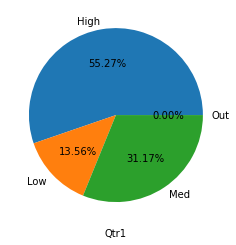

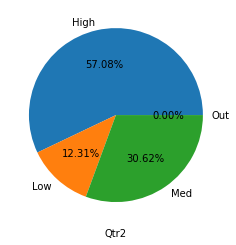

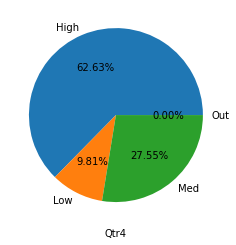

In [99]:
plt.figure(0)
plt.pie(q8_1.Sales2016, labels = q8_1.Tier, autopct = '%1.2f%%')
plt.xlabel('Qtr1')
plt.figure(1)
plt.pie(q8_2.Sales2016, labels = q8_2.Tier, autopct = '%1.2f%%')
plt.xlabel('Qtr2')
plt.figure(2)
plt.pie(q8_4.Sales2016, labels = q8_4.Tier, autopct = '%1.2f%%')
plt.xlabel('Qtr4')
plt.show()